In [1]:
import pandas as pd     

In [2]:
df = pd.read_excel("all_matches_data_py.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9158 entries, 0 to 9157
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   matchId                      9158 non-null   object 
 1   championName                 9158 non-null   object 
 2   summonerName                 8857 non-null   object 
 3   win                          9158 non-null   bool   
 4   gameEndedInSurrender         9158 non-null   bool   
 5   gameEndedInEarlySurrender    9158 non-null   bool   
 6   kills                        9158 non-null   int64  
 7   deaths                       9158 non-null   int64  
 8   assists                      9158 non-null   int64  
 9   goldEarned                   9158 non-null   int64  
 10  goldSpent                    9158 non-null   int64  
 11  totalMinionsKilled           9158 non-null   int64  
 12  baronKills                   9158 non-null   int64  
 13  dragonKills       

In [3]:
df.head()

,matchId,championName,summonerName,win,gameEndedInSurrender,gameEndedInEarlySurrender,kills,deaths,assists,goldEarned,...,wardsKilled,killingSprees,longestTimeSpentLiving,totalTimeSpentDead,bountyLevel,spell1Casts,spell2Casts,spell3Casts,spell4Casts,timePlayed
0,EUW1_7299723064,Pantheon,NaN,True,False,False,4,6,3,10431,...,0,2,218,153,4,176,81,64,5,1029
1,EUW1_7299723064,Xerath,NaN,True,False,False,10,5,10,13491,...,0,3,203,129,10,144,67,42,58,1029
2,EUW1_7299723064,Maokai,NaN,True,False,False,3,6,8,10806,...,0,0,312,187,3,90,54,93,11,1029
3,EUW1_7299723064,Zed,NaN,True,False,False,16,5,7,16416,...,0,4,186,117,16,166,177,200,31,1029
4,EUW1_7299723064,Ezreal,NaN,True,False,False,11,4,9,16140,...,0,2,288,108,11,227,88,50,22,1029


In [4]:
# Preprocess data: filter by my summoner and aatrox games
df = df[df["summonerName"] == "euclidean aatrox"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 66 to 9155
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   matchId                      905 non-null    object 
 1   championName                 905 non-null    object 
 2   summonerName                 905 non-null    object 
 3   win                          905 non-null    bool   
 4   gameEndedInSurrender         905 non-null    bool   
 5   gameEndedInEarlySurrender    905 non-null    bool   
 6   kills                        905 non-null    int64  
 7   deaths                       905 non-null    int64  
 8   assists                      905 non-null    int64  
 9   goldEarned                   905 non-null    int64  
 10  goldSpent                    905 non-null    int64  
 11  totalMinionsKilled           905 non-null    int64  
 12  baronKills                   905 non-null    int64  
 13  dragonKills            

In [5]:
# What champions did I play? - Fun Fact: Wukong is saved internally as "MonkeyKing"
print(df["championName"].unique())

['Thresh' 'Kennen' 'Volibear' 'Ekko' 'Camille' 'Leblanc' 'Illaoi' 'Velkoz'
 'XinZhao' 'Nocturne' 'Kaisa' 'Aatrox' 'LeeSin' 'Fiora' 'Karma' 'Nautilus'
 'Darius' 'Corki' 'Syndra' 'Chogath' 'Ryze' 'Gragas' 'Xerath' 'Kayn'
 'Blitzcrank' 'Lissandra' 'Leona' 'Orianna' 'Renekton' 'Nidalee' 'Anivia'
 'Gangplank' 'Rumble' 'Morgana' 'Shaco' 'Sylas' 'Gnar' 'Zac' 'Zed' 'Jayce'
 'MissFortune' 'Amumu' 'Zilean' 'Shen' 'Lucian' 'Vi' 'TwistedFate' 'Lux'
 'Akshan' 'RekSai' 'Pyke' 'Pantheon' 'Sett' 'Belveth' 'MonkeyKing'
 'Ezreal' 'Jinx' 'Ahri' 'Caitlyn' 'Khazix' 'Jhin' 'Swain' 'JarvanIV'
 'Graves' 'Tristana' 'Brand' 'Azir' 'Malzahar' 'Kindred' 'Yasuo'
 'Vladimir' 'Garen' 'Akali' 'Heimerdinger' 'Viego' 'Nasus' 'Poppy' 'Varus'
 'Ashe' 'Mordekaiser' 'Qiyana' 'Rakan' 'Warwick' 'TahmKench' 'Zyra'
 'Ivern' 'Riven' 'Shyvana' 'Elise' 'Twitch' 'Olaf' 'Jax' 'Yone' 'Bard'
 'Irelia' 'Hwei' 'Neeko' 'Quinn' 'Katarina' 'Senna' 'Malphite' 'Vex'
 'Annie' 'Kassadin' 'Soraka' 'Veigar' 'Viktor' 'Sion' 'Lillia' 'Ornn'
 'Gal

In [6]:
# Only get toplane champs to investigate my playstyle
top_champs = ["Camille", "Aatrox"]
df = df[df["championName"].isin(top_champs)]
print(df["championName"].unique())
print(len(df))

['Camille' 'Aatrox']
94


In [7]:
# Investigate pre-selected attributes to select final subset
df.describe()

,kills,deaths,assists,goldEarned,goldSpent,totalMinionsKilled,baronKills,dragonKills,turretKills,turretTakedowns,...,wardsKilled,killingSprees,longestTimeSpentLiving,totalTimeSpentDead,bountyLevel,spell1Casts,spell2Casts,spell3Casts,spell4Casts,timePlayed
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.0,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,14.510638,10.957447,17.936170,15011.638298,13723.936170,71.723404,0.0,0.042553,0.723404,1.712766,...,0.180851,3.872340,243.404255,322.191489,3.627660,147.829787,36.319149,89.723404,9.638298,1324.606383
std,7.646413,4.471931,9.897114,3823.309015,3355.162412,71.780490,0.0,0.250371,0.966139,1.388295,...,0.621527,2.352002,265.174940,205.630438,6.824976,60.957880,13.017947,43.079672,3.457425,388.291023
min,1.000000,1.000000,0.000000,5749.000000,5050.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,76.000000,12.000000,0.000000,47.000000,7.000000,28.000000,3.000000,650.000000
25%,8.250000,8.250000,9.250000,12916.000000,11677.000000,28.250000,0.0,0.000000,0.000000,1.000000,...,0.000000,2.000000,112.250000,222.500000,0.000000,104.500000,27.000000,60.500000,7.000000,1045.250000
50%,14.000000,11.000000,17.500000,15115.000000,13850.000000,43.500000,0.0,0.000000,0.000000,2.000000,...,0.000000,3.000000,151.000000,296.000000,1.000000,131.000000,33.500000,79.500000,9.500000,1257.000000
75%,20.000000,14.000000,26.750000,17325.000000,16456.250000,81.250000,0.0,0.000000,1.000000,2.750000,...,0.000000,6.000000,231.750000,371.500000,3.750000,183.750000,46.750000,106.750000,12.000000,1513.750000
max,41.000000,24.000000,39.000000,23676.000000,20250.000000,312.000000,0.0,2.000000,6.000000,6.000000,...,3.000000,12.000000,1400.000000,1382.000000,41.000000,335.000000,76.000000,246.000000,17.000000,2593.000000


In [8]:
final_attr = ["matchId", "win", # Metadata
              "kills", "deaths", "assists", # KDA
              "goldEarned", "totalMinionsKilled", "turretKills", "totalDamageDealtToChampions", "damagePerMinute", # Damage
              "wardsPlaced", "longestTimeSpentLiving", "totalTimeSpentDead", "timePlayed", # Time
              "spell1Casts", "spell2Casts", "spell3Casts", "spell4Casts"] # Spells

In [9]:
df = df[final_attr]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 108 to 9139
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   matchId                      94 non-null     object 
 1   win                          94 non-null     bool   
 2   kills                        94 non-null     int64  
 3   deaths                       94 non-null     int64  
 4   assists                      94 non-null     int64  
 5   goldEarned                   94 non-null     int64  
 6   totalMinionsKilled           94 non-null     int64  
 7   turretKills                  94 non-null     int64  
 8   totalDamageDealtToChampions  94 non-null     int64  
 9   damagePerMinute              94 non-null     float64
 10  wardsPlaced                  94 non-null     int64  
 11  longestTimeSpentLiving       94 non-null     int64  
 12  totalTimeSpentDead           94 non-null     int64  
 13  timePlayed             

,matchId,win,kills,deaths,assists,goldEarned,totalMinionsKilled,turretKills,totalDamageDealtToChampions,damagePerMinute,wardsPlaced,longestTimeSpentLiving,totalTimeSpentDead,timePlayed,spell1Casts,spell2Casts,spell3Casts,spell4Casts
108,EUW1_7262163970,True,7,9,17,9606,20,0,17711,1247.944169,0,123,189,848,68,7,49,4
200,EUW1_7255107922,True,7,3,4,9979,140,1,27024,1352.109640,5,418,75,1199,168,35,93,5
220,EUW1_7254962496,False,2,11,3,9797,191,0,21521,690.052145,9,391,337,1871,194,31,126,6
235,EUW1_7252429927,False,2,9,0,8018,179,0,14946,597.066375,3,267,259,1501,142,23,93,8
255,EUW1_7252299362,False,9,5,7,16841,262,2,42478,1181.851600,11,1189,178,2156,262,54,198,11


In [10]:
# EDA - correlation
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt        

df_numeric = df.drop(columns=["matchId", "win"])
df_numeric.head()

,kills,deaths,assists,goldEarned,totalMinionsKilled,turretKills,totalDamageDealtToChampions,damagePerMinute,wardsPlaced,longestTimeSpentLiving,totalTimeSpentDead,timePlayed,spell1Casts,spell2Casts,spell3Casts,spell4Casts
108,7,9,17,9606,20,0,17711,1247.944169,0,123,189,848,68,7,49,4
200,7,3,4,9979,140,1,27024,1352.109640,5,418,75,1199,168,35,93,5
220,2,11,3,9797,191,0,21521,690.052145,9,391,337,1871,194,31,126,6
235,2,9,0,8018,179,0,14946,597.066375,3,267,259,1501,142,23,93,8
255,9,5,7,16841,262,2,42478,1181.851600,11,1189,178,2156,262,54,198,11


,kills,deaths,assists,goldEarned,totalMinionsKilled,turretKills,totalDamageDealtToChampions,damagePerMinute,wardsPlaced,longestTimeSpentLiving,totalTimeSpentDead,timePlayed,spell1Casts,spell2Casts,spell3Casts,spell4Casts
kills,1.000000,0.432395,0.337747,0.782401,-0.058904,0.220187,0.781893,0.807478,-0.228042,-0.180587,0.088573,0.075322,0.331414,0.331164,0.197759,0.439416
deaths,0.432395,1.000000,0.613382,0.499805,-0.288788,-0.184433,0.495552,0.488705,-0.467380,-0.530654,0.294947,-0.011484,0.001551,-0.000318,-0.093161,0.330031
assists,0.337747,0.613382,1.000000,0.449111,-0.462920,-0.117692,0.367474,0.521860,-0.565133,-0.434475,0.082756,-0.222295,-0.136702,0.000160,-0.194888,0.173090
goldEarned,0.782401,0.499805,0.449111,1.000000,0.153646,0.337462,0.839653,0.639065,-0.010756,0.023305,0.270949,0.474002,0.571364,0.633710,0.507076,0.759569
totalMinionsKilled,-0.058904,-0.288788,-0.462920,0.153646,1.000000,0.511014,0.075480,-0.320192,0.904977,0.712447,-0.220585,0.775716,0.723490,0.510150,0.835389,0.308340
turretKills,0.220187,-0.184433,-0.117692,0.337462,0.511014,1.000000,0.224142,0.055501,0.454660,0.329994,-0.160966,0.435182,0.462939,0.440548,0.560049,0.317382
totalDamageDealtToChampions,0.781893,0.495552,0.367474,0.839653,0.075480,0.224142,1.000000,0.841448,-0.090091,-0.094253,0.411576,0.375448,0.598742,0.604814,0.410386,0.694189
damagePerMinute,0.807478,0.488705,0.521860,0.639065,-0.320192,0.055501,0.841448,1.000000,-0.473484,-0.384573,0.289969,-0.143357,0.173872,0.227709,-0.041505,0.338374
wardsPlaced,-0.228042,-0.467380,-0.565133,-0.010756,0.904977,0.454660,-0.090091,-0.473484,1.000000,0.798140,-0.211979,0.758398,0.656693,0.495821,0.793237,0.246376
longestTimeSpentLiving,-0.180587,-0.530654,-0.434475,0.023305,0.712447,0.329994,-0.094253,-0.384573,0.798140,1.000000,-0.304083,0.593852,0.549576,0.455131,0.672351,0.163113


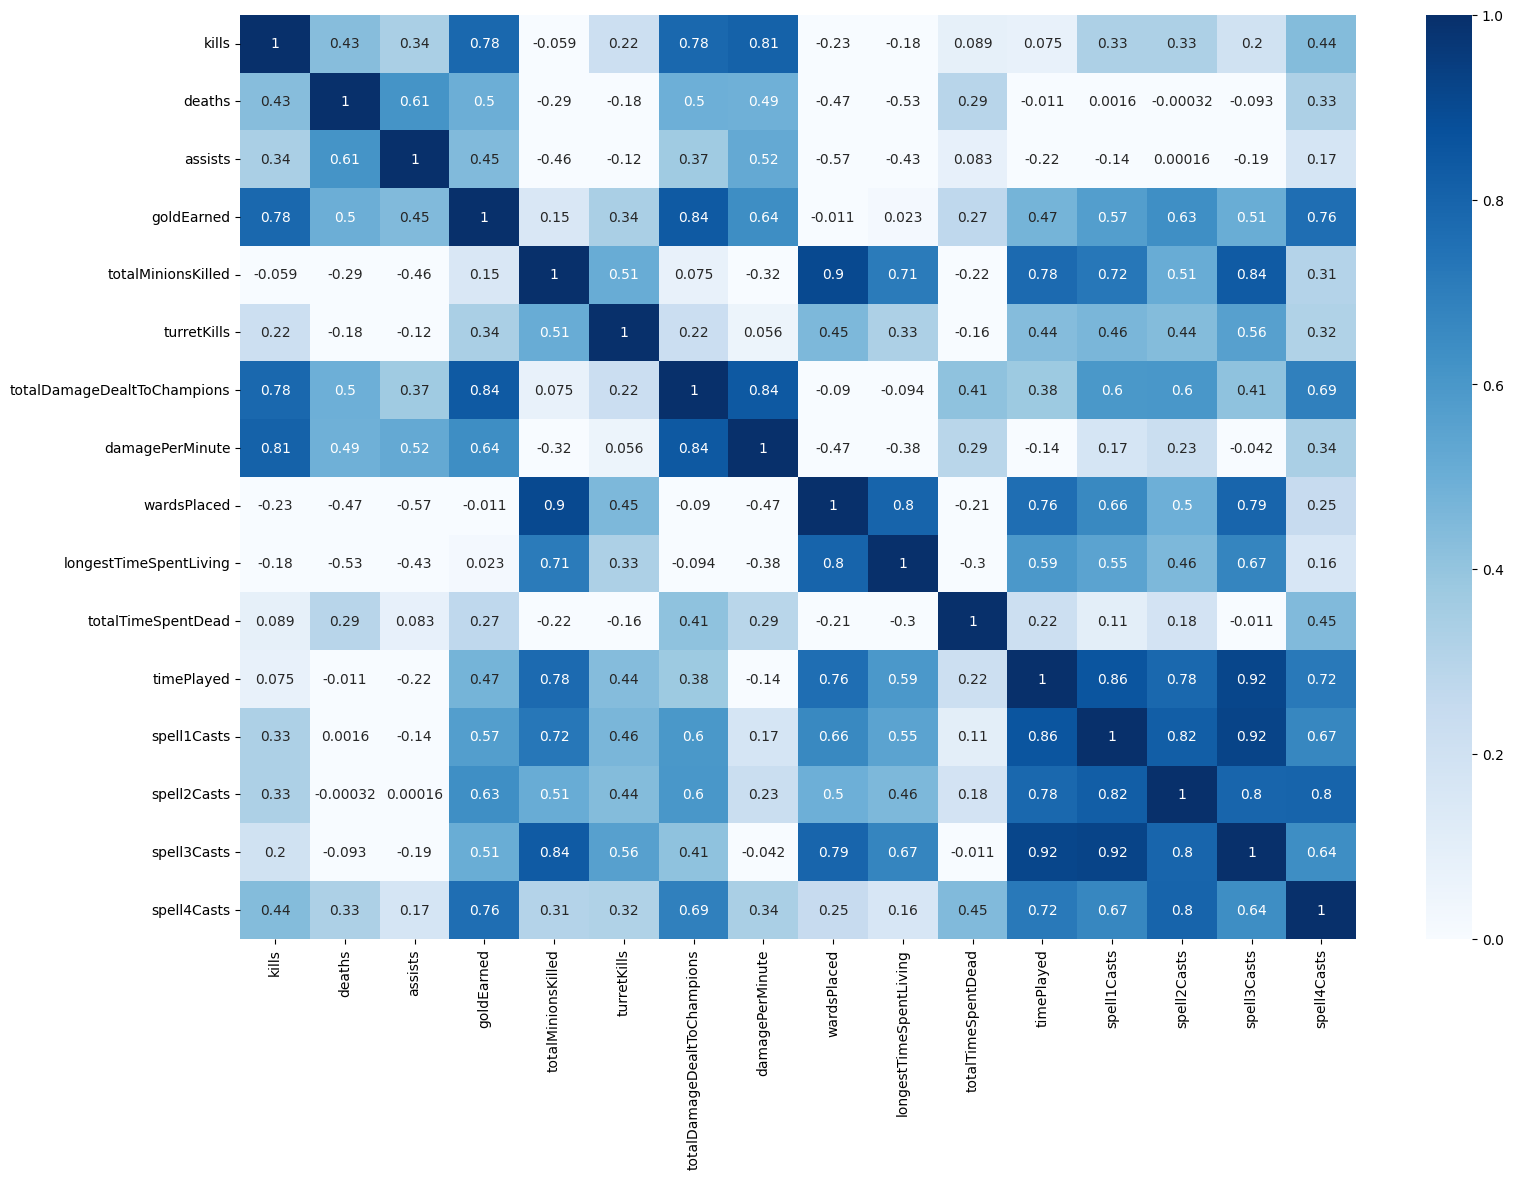

In [11]:
corr = df_numeric.corr(method="pearson")
display(corr)

corr_heatmap = plt.figure(figsize=(18,12))
sns.heatmap(corr, cmap="Blues", annot=True, vmin=0, vmax=1)
plt.show()